# Dimension reduction

PCA - principal component analysis

In [ ]:
import numpy as np
from numpy import sin, cos, pi
from matplotlib.pyplot import *

rng = np.random.default_rng(42)  # setup random number generator with fixed seed

## 2D synthetic data

In [ ]:
N = 1000
center = 10, 15
sigmas = 10, 2
theta = 20 / 180 * pi  # theta in radians

In [ ]:
# covariance matrix
rotmat = np.array([[cos(theta), -sin(theta)],[sin(theta), cos(theta)]])
diagmat = np.diagflat(sigmas)
covar = rotmat @ diagmat @ rotmat.T
print('covariance matrix:')
print(covar)
eigval, eigvec = np.linalg.eigh(covar)
print(f'eigenvalues: {eigval}\neigenvectors:\n{eigvec}')
print('angle of eigvector corresponding to larger eigenvalue:',
      180 /pi * np.arctan2(eigvec[1,1], eigvec[0,1]))

covariance matrix:
[[9.06417777 2.57115044]
 [2.57115044 2.93582223]]
eigenvalues: [ 2. 10.]
eigenvectors:
[[ 0.34202014 -0.93969262]
 [-0.93969262 -0.34202014]]
angle of eigvector corresponding to larger eigenvalue: -160.0


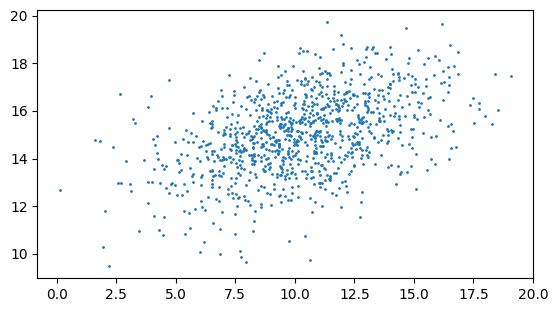

In [ ]:
# data points
data = rng.multivariate_normal(center, covar, size=N)
scatter(data[:,0], data[:,1], s=1)
gca().set_aspect('equal')

In [ ]:
# PCA
mean = data.mean(axis=0)
print('mean:', mean)
# S1: explicit sum
S1 = np.zeros((2,2), dtype=float)
for i in range(len(data)):
  S1 += np.outer(data[i] - mean, data[i] - mean)
S1 /= len(data)
print(f'S1= (explicit sum)\n{S1}')
# S2:
S2 = np.cov(data, rowvar=False, bias=True)
print(f'S2= (np.cov)\n{S2}')
# PCA:
lambdas, u = np.linalg.eigh(S2)
print(f'\nPCA\nlambda={lambdas}\nu=\n{u}')
u1 = u[:,1] # largest
print(f'first principal component angle: {180/pi*np.arctan2(u1[1], u1[0])}')

mean: [10.23096301 15.02556061]
S1= (explicit sum)
[[9.07259886 2.30112111]
 [2.30112111 2.79465364]]
S2= (np.cov)
[[9.07259886 2.30112111]
 [2.30112111 2.79465364]]

PCA
lambda=[2.04154359 9.8257089 ]
u=
[[ 0.31104498 -0.95039519]
 [-0.95039519 -0.31104498]]
first principal component angle: -161.87778294132752


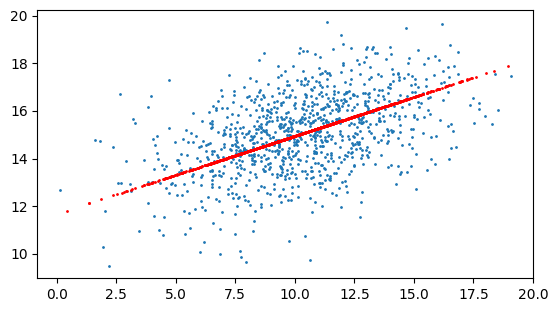

In [ ]:
# plot reconstruction by first principal component
reconstr = np.zeros_like(data)
for i in range(len(data)):
  reconstr[i] = mean + ((data[i] - mean) @ u1) * u1
# plot
scatter(data[:,0], data[:,1], s=1)
scatter(reconstr[:,0], reconstr[:,1], s=1, c='red')
gca().set_aspect('equal')

u1: [[-0.95039519 -0.31104498]], angle: -161.87778294132752
(1000, 1)


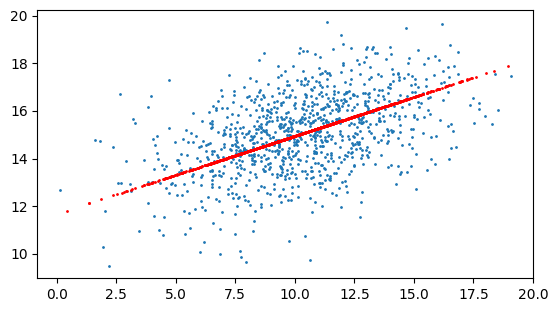

In [ ]:
# PCA by sklearn library
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=1)
pca.fit(data)
print(f'u1: {pca.components_}, '
    f'angle: {180/pi*np.arctan2(pca.components_[0,1], pca.components_[0,0])}')
proj = pca.transform(data)
print(proj.shape)
reconstr2 = pca.inverse_transform(proj)
# plot
scatter(data[:,0], data[:,1], s=1)
scatter(reconstr2[:,0], reconstr2[:,1], s=1, c='red')
gca().set_aspect('equal')

## Data visualization

In [ ]:
# IRIS dataset
import sklearn.datasets
iris = sklearn.datasets.load_iris()
print(iris.keys())
print()
print(iris.DESCR)



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    pet

In [ ]:
# check dataset
print(f'data: shape={iris["data"].shape}, feature_names={iris.feature_names}\n{iris["data"][:5]}')
print(f'target: shape={iris["target"].shape}\n{iris["target"][:5]}')
print(f'{iris.target_names}')

data: shape=(150, 4), feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target: shape=(150,)
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


(150,)
[2 2 2 2 2]


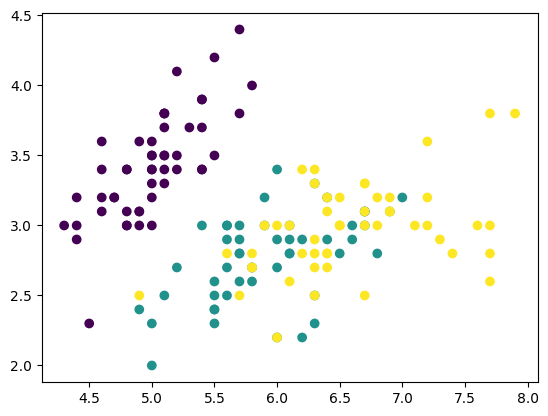

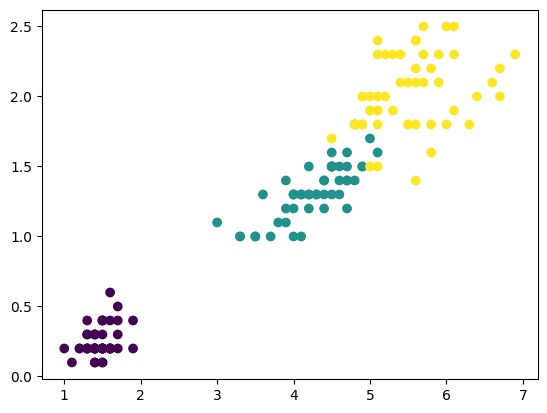

In [ ]:
x = iris['data']
y = iris['target']
print(y.shape)
print(y[-5:])
# plot projections
scatter(x[:,0], x[:,1], c=y)
figure()
scatter(x[:,2], x[:,3], c=y)

u1=[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
u2=[ 0.65658877  0.73016143 -0.17337266 -0.07548102]
explained variance fraction: [0.92461872 0.05306648 0.01710261 0.00521218]


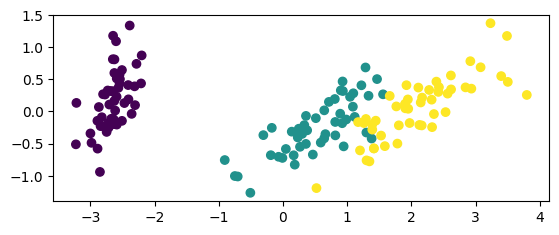

In [ ]:
# 2D pca
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(x)
proj = pca.transform(x)
scatter(proj[:,0], proj[:,1], c=y)
gca().set_aspect('equal')
print(f'u1={pca.components_[0]}')
print(f'u2={pca.components_[1]}')
print(f'explained variance fraction: {pca.explained_variance_ratio_}')

## High dimensional data

In [ ]:
# MNIST
# credits: https://www.learndatasci.com/tutorials/applied-dimensionality-reduction-techniques-using-python/
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'train: x shape={x_train.shape}, y shape={y_train.shape}')
print(f'test: x shape={x_test.shape}, y shape={y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
train: x shape=(60000, 28, 28), y shape=(60000,)
test: x shape=(10000, 28, 28), y shape=(10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

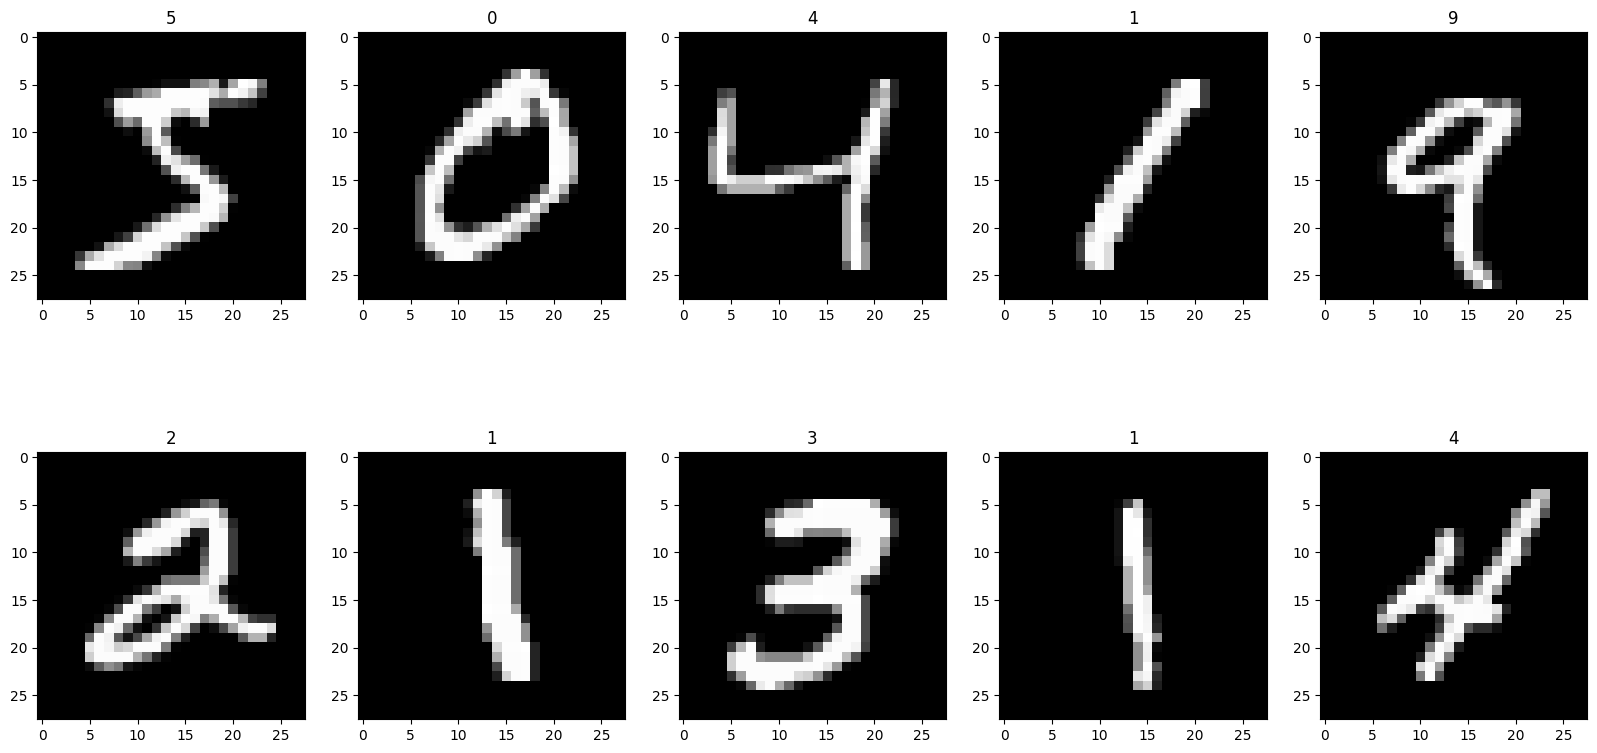

In [ ]:
# plot examples
figure(figsize=(20,10))
print(x_train[0])
for i in range(10):
  subplot(2, 5, i+1)
  imshow(x_train[i], cmap='gray')
  title(f'{y_train[i]}')

In [ ]:
# pca, standardized
explained_var_fraction = 0.6
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# flat data
x_flat_train = np.reshape(x_train, (len(x_train), -1))/255
x_flat_test = np.reshape(x_test, (len(x_test), -1))/255
print(f'flat_train: x shape={x_flat_train.shape}, y shape={y_train.shape}')
#
pipeline = Pipeline([
                     ('scaling', StandardScaler()),
                     ('pca', PCA(n_components=explained_var_fraction)),
                     ])
pipeline.fit(x_flat_train)
n_comp = pipeline["pca"].n_components_
print(f'number of components for explained_var_fraction={explained_var_fraction}: {n_comp}  ({100 * n_comp / x_flat_train.shape[1]:.1f}%)')

flat_train: x shape=(60000, 784), y shape=(60000,)
number of components for explained_var_fraction=0.6: 64  (8.2%)


In [ ]:
# reconstruction
flat_proj = pipeline.transform(x_flat_test)
print(f'flat_proj shape={flat_proj.shape}')
flat_reconstr = pipeline.inverse_transform(flat_proj)
print(f'flat_reconstr shape={flat_reconstr.shape}')
reconstr = flat_reconstr.reshape(-1, 28, 28)
print(f'reconstr shape={reconstr.shape}')

flat_proj shape=(10000, 64)
flat_reconstr shape=(10000, 784)
reconstr shape=(10000, 28, 28)


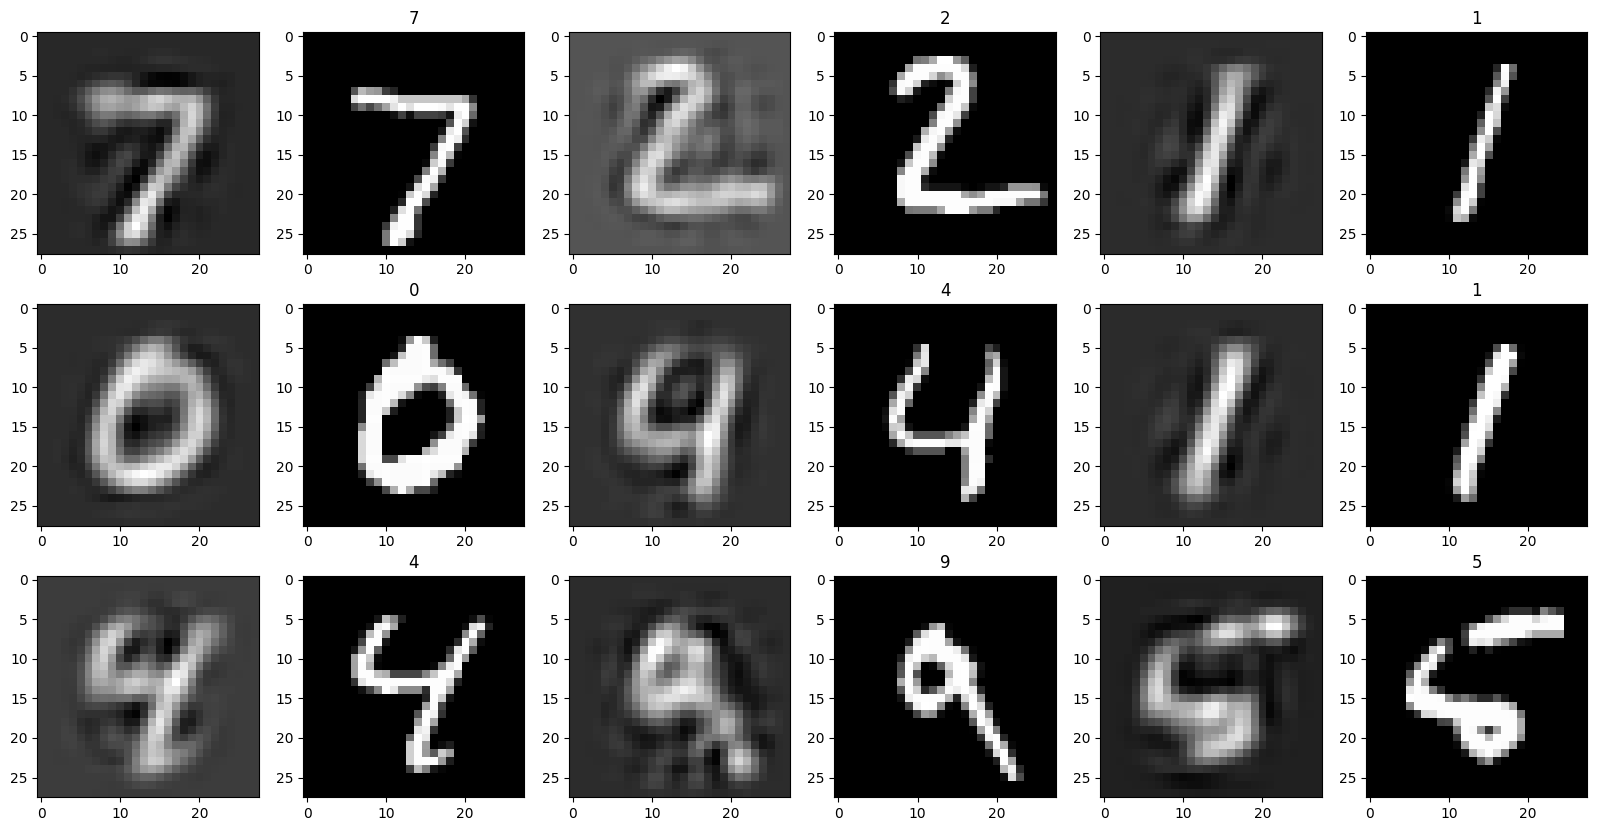

In [ ]:
# plot examples
figure(figsize=(20,10))
for i in range(9):
  subplot(3, 6, 2*i+1)
  imshow(reconstr[i], cmap='gray')
  subplot(3, 6, 2*i+2)
  imshow(x_test[i], cmap='gray')
  title(f'{y_test[i]}')

In [ ]:
# classification with SVM with dimension reduction
from sklearn.svm import SVC
import time
pipe1 = Pipeline([
                  ('scaling', StandardScaler()),
                  ('pca', PCA(n_components=explained_var_fraction)),
                  ('classification', SVC()),
])

t0 = time.time()
# train
pipe1.fit(x_flat_train, y_train)
# predict
y_pred1 = pipe1.predict(x_flat_test)
print(f'training + prediction: {time.time() - t0:.1f} s')

training + prediction: 66.0 s


In [ ]:
import sklearn.metrics
print(y_pred1[200:250])
print(y_test[200:250])

# accuracy
print(f'accuracy: {sklearn.metrics.accuracy_score(y_true=y_test, y_pred=y_pred1)}')

# confusion matrix
print(f'confusion matrix:\n{sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=y_pred1)}')
# rows: ground truth label.  columns: predicted label

[3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2
 2 4 1 5 8 8 7 2 3 0 2 4 2]
[3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2
 2 4 1 5 9 8 7 2 3 0 4 4 2]
accuracy: 0.9711
confusion matrix:
[[ 970    0    1    2    0    4    3    0    0    0]
 [   0 1128    3    0    0    1    1    0    1    1]
 [   5    0 1004    2    1    0    1   10    7    2]
 [   0    0    0  989    1    5    0    8    6    1]
 [   0    1    6    0  948    0    5    7    3   12]
 [   2    0    0   12    1  863    6    2    5    1]
 [   4    3    1    1    3    8  934    1    3    0]
 [   2    9   12    1    3    0    0  987    1   13]
 [   3    0    5    8    5    9    2    5  933    4]
 [   2    5    2    7   14    4    0   13    7  955]]


In [ ]:
# classification with SVM on full data
pipe2 = Pipeline([
                  ('scaling', StandardScaler()),
                  ('classification', SVC()),
])

t0 = time.time()
# train
pipe2.fit(x_flat_train, y_train)
# predict
y_pred2 = pipe2.predict(x_flat_test)
print(f'training + prediction: {time.time() - t0:.1f} s')

training + prediction: 888.6 s


In [ ]:
# accuracy
print(f'accuracy: {sklearn.metrics.accuracy_score(y_true=y_test, y_pred=y_pred2)}')

# confusion matrix
print(f'confusion matrix:\n{sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=y_pred2)}')

accuracy: 0.9661
confusion matrix:
[[ 968    0    1    1    0    3    3    2    2    0]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    4  980    1    7    0   11    7    0]
 [   0    0   12    0  944    2    4    7    3   10]
 [   2    0    1   10    2  854    6    8    7    2]
 [   6    2    1    0    4    8  930    2    5    0]
 [   1    6   13    2    3    0    0  990    0   13]
 [   3    0    4    6    6    9    3   14  926    3]
 [   4    6    5   11   12    2    0   20    3  946]]


Related methods: <br>
t-sne, or more recently umap: nonlinear manifold<br>
lda: train with labels, max separation between classes